In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from src.etl import get_train_test_data

In [ ]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a presentation
    sns.set_context("talk")
    
    # Set the font to be serif, rather than sans
    sns.set_theme(font='serif', font_scale=2, rc = {'figure.figsize': (15,8)})
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("whitegrid", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
set_style()

In [5]:
df, _ = get_train_test_data(train_only=True)

<AxesSubplot: title={'center': 'Tumor Type Counts'}>

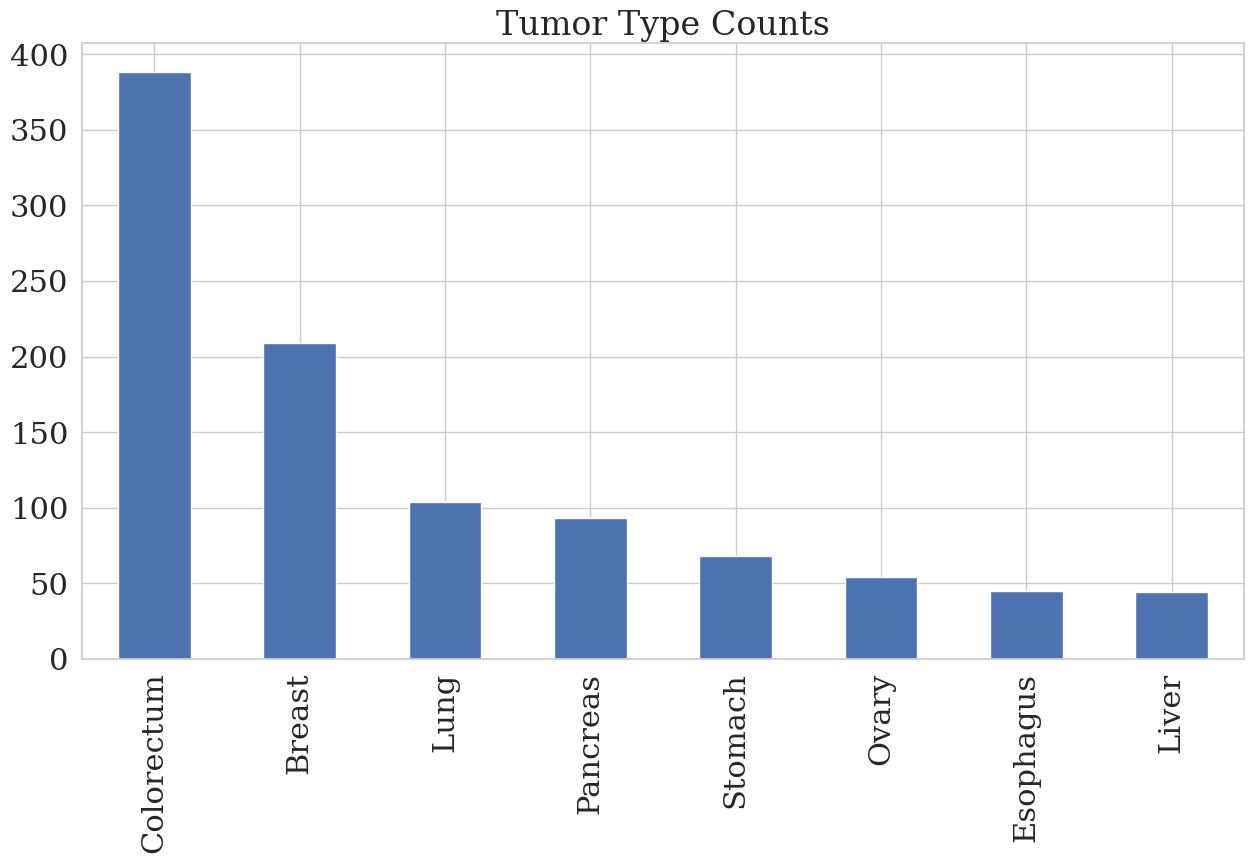

In [6]:
df.tumor_type.value_counts().drop("Normal").plot(
    kind="bar", title="Tumor Type Counts")

<AxesSubplot: title={'center': 'Count of Cancer vs. Normal Samples'}>

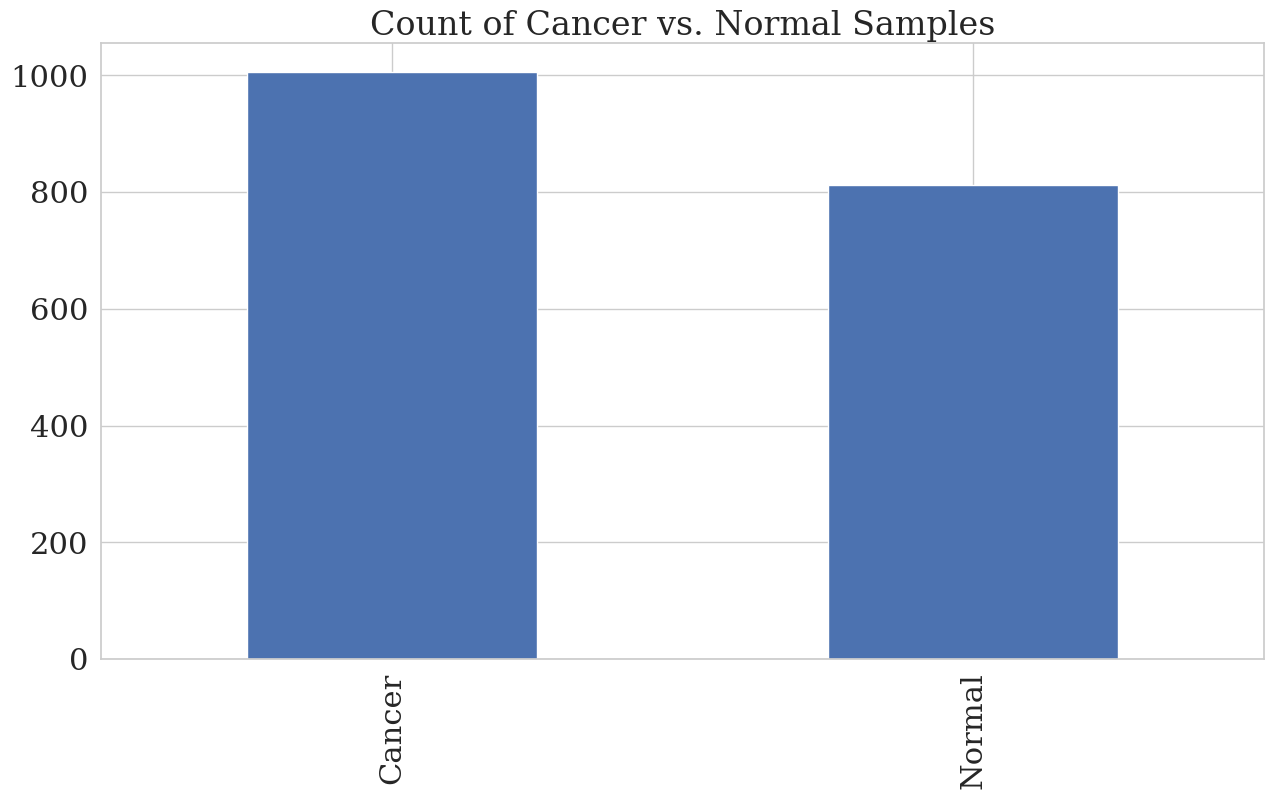

In [7]:
df.assign(cancer = df.tumor_type != "Normal").cancer.map(
    {True: "Cancer", False: "Normal"}).value_counts().plot(
        kind="bar", title="Count of Cancer vs. Normal Samples")

In [9]:
from config import MUTATION_COL

<AxesSubplot: title={'center': 'Distribution of mutations per gene in whole cohort'}>

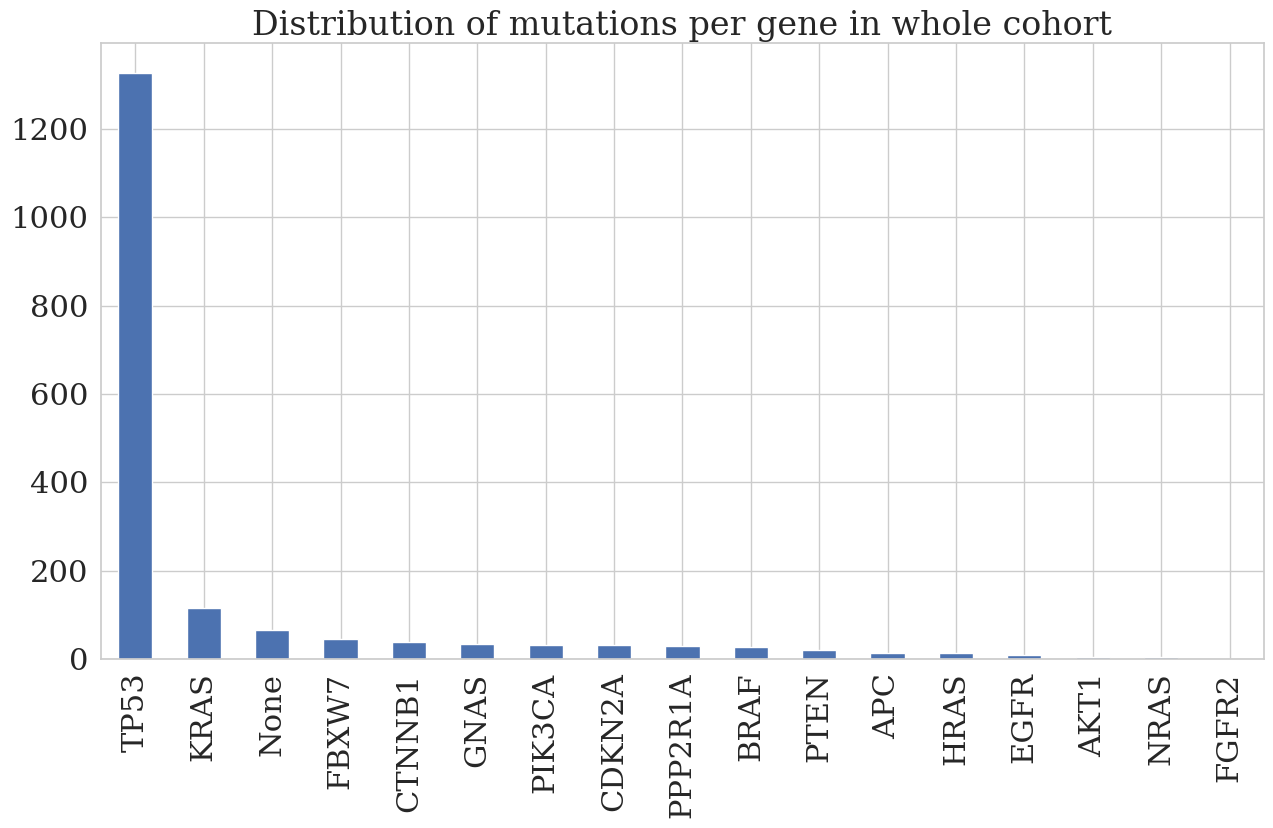

In [10]:
df[MUTATION_COL].str.split(' ').apply(
    lambda x: x[0]).value_counts().plot(
        kind="bar",
        title = "Distribution of mutations per gene in whole cohort")

In [16]:
import pandas as pd
from config import NON_CANCER_STATUS

In [14]:
def get_gene_name(mutation_string):
    if pd.isna(mutation_string):
        return None
    return str(mutation_string).split(' ')[0]

In [17]:
total_mutations = df[MUTATION_COL].apply(get_gene_name).value_counts()
cancer_patients_df = df[df['tumor_type'] != NON_CANCER_STATUS]
cancer_mutations = cancer_patients_df[MUTATION_COL].apply(get_gene_name).value_counts()

In [39]:
mutations_df = pd.DataFrame({
    'Total Mutations': total_mutations,
    'Mutations in Cancer Patients': cancer_mutations
})

In [40]:
colors = sns.color_palette("pastel", 2)

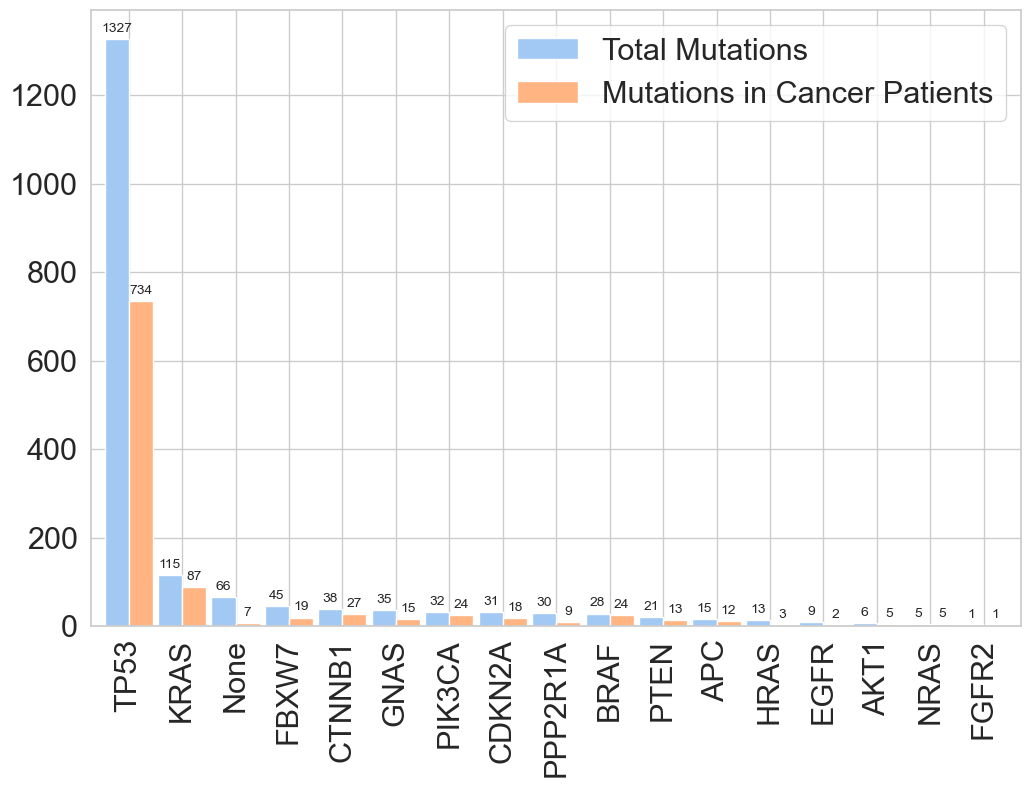

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
mutations_df.sort_values(by='Total Mutations', ascending=False).plot(kind='bar', ax=ax, rot=90, width=0.9, color = colors)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

In [ ]:
df_filtered = df.copy()
df_filtered['gene_name'] = df_filtered[MUTATION_COL].apply(get_gene_name)
df_filtered = df_filtered.query('gene_name != "None"', engine="python")
df_filtered['cancer'] = df.assign(cancer = df.tumor_type != "Normal").cancer.map(
    {True: "C.", False: "N."})
df_filtered = df_filtered.dropna(subset=['cancer', 'gene_name', 'omega_score'])

Text(0.5, 1.03, 'Distribution of Omega Score by Gene')

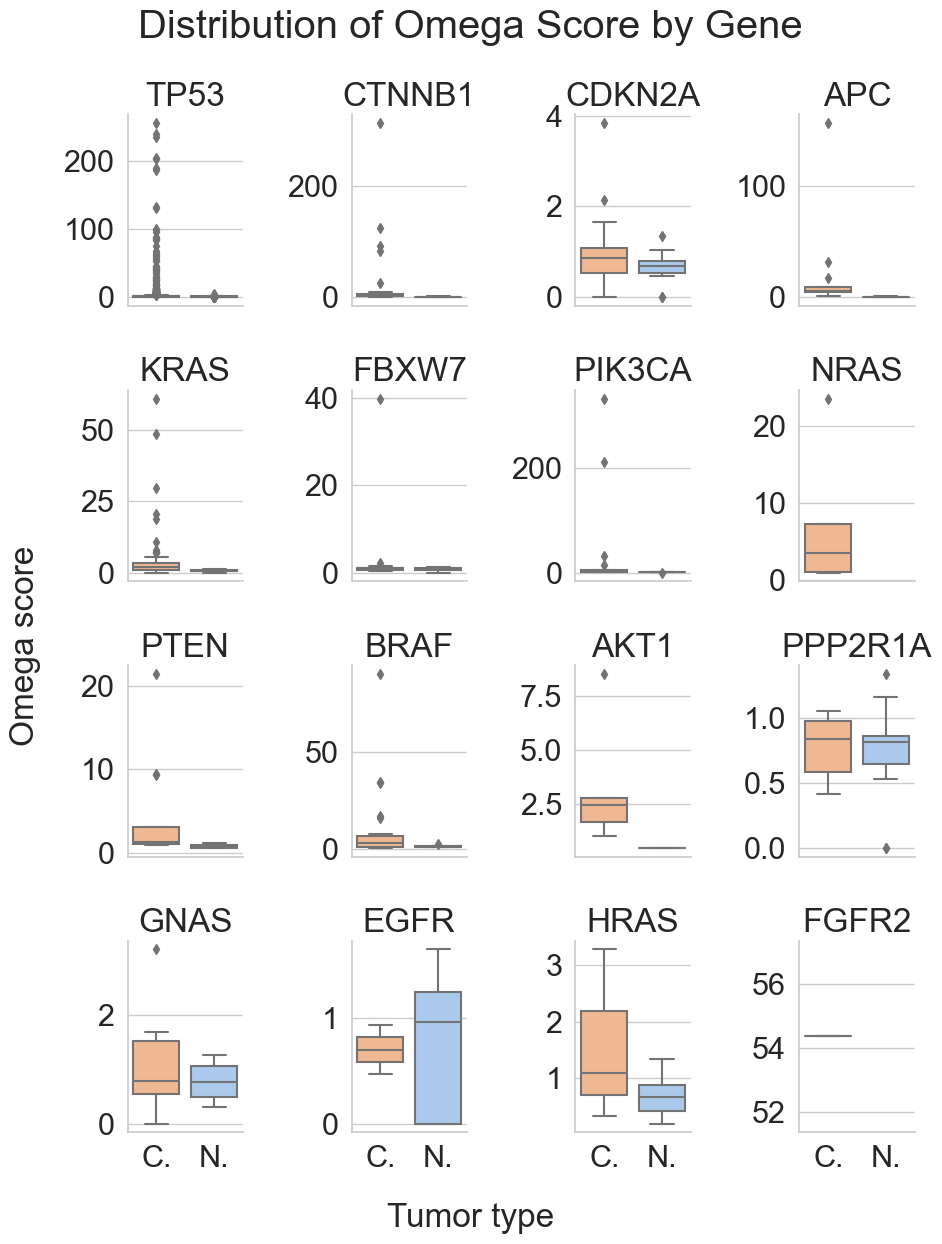

In [ ]:
custom_palette = {'N.': colors[0], 'C.': colors[1]}
p = sns.catplot(
    data=df_filtered,
    x='cancer',
    y='omega_score',
    col='gene_name',
    kind='box',
    col_wrap=4,
    height=3,
    aspect=0.8,
    palette=custom_palette,
    sharey=False, 
)
p.set_axis_labels("", "")
p.figure.supylabel("Omega score", fontsize=24)
p.figure.supxlabel("Tumor type", fontsize=24)
p.set_titles("{col_name}")
p.figure.suptitle("Distribution of Omega Score by Gene", y=1.03)

In [26]:
import numpy as np
from scipy.stats import norm

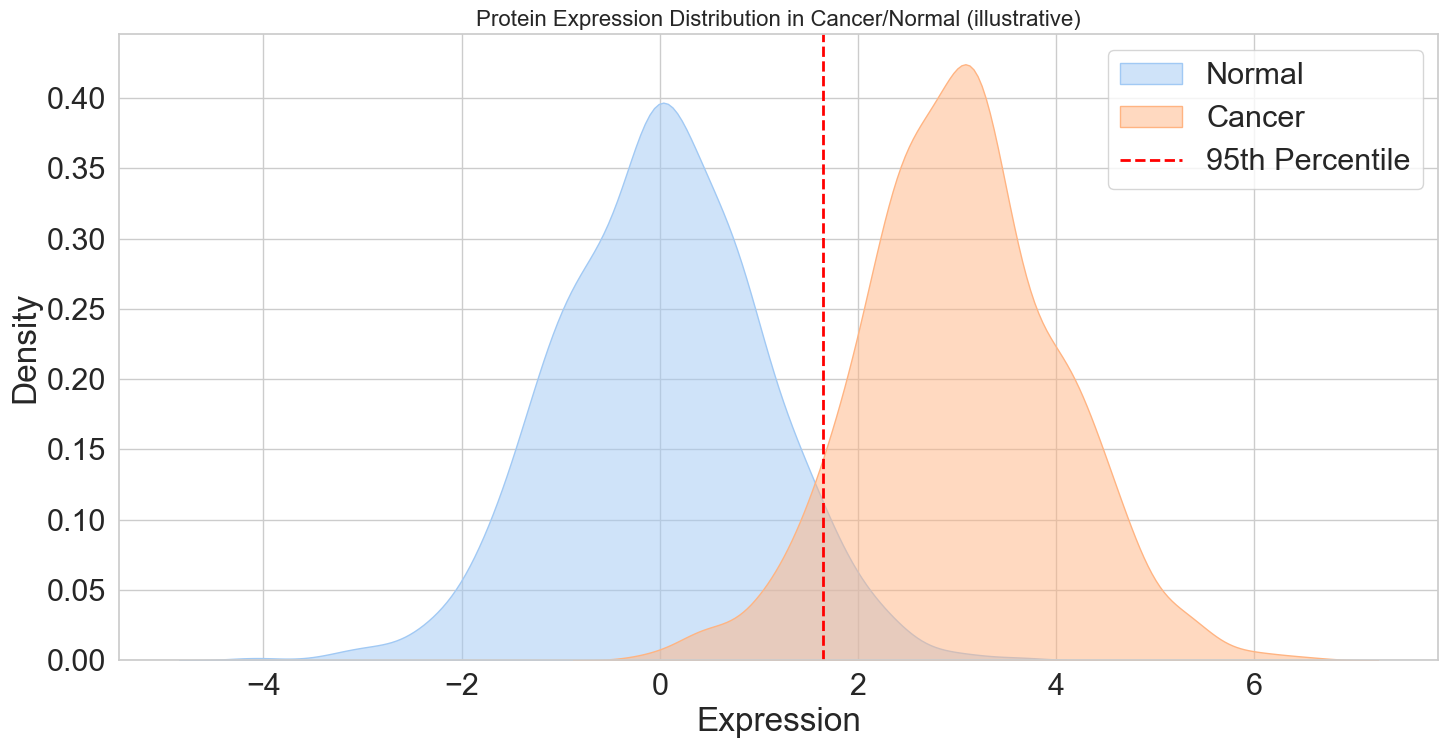

In [31]:
mean_normal = 0
std_normal = 1
mean_cancer = 3
std_cancer = 1 

normal_data = np.random.normal(mean_normal, std_normal, 1000)
cancer_data = np.random.normal(mean_cancer, std_cancer, 1000)

sns.kdeplot(normal_data, label='Normal', fill=True, color=colors[0], alpha=0.5)
sns.kdeplot(cancer_data, label='Cancer', fill=True, color=colors[1], alpha=0.5)

percentile_95 = norm.ppf(0.95, loc=mean_normal, scale=std_normal)

# Draw the vertical line at the 95th percentile
plt.axvline(
    x=percentile_95,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'95th Percentile'
)

# Add title, labels, and legend
plt.title('Protein Expression Distribution in Cancer/Normal (illustrative)', fontsize=16)
plt.xlabel('Expression', fontsize=24)
plt.ylabel('Density', fontsize=24)
plt.legend()
plt.tight_layout()